<a href="https://colab.research.google.com/github/ananyadix/mental_health/blob/main/mental_health_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/mental_health.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv(path)

In [6]:
df.shape

(1259, 27)

In [7]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [9]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [10]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
df.drop(['comments'],axis=1,inplace=True)

In [12]:
df.drop(['Timestamp'],axis=1,inplace=True)

In [13]:
df.drop(['state'],axis=1,inplace=True)

In [14]:
df.isnull().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1241 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [16]:
defaultint=0
defaultstring='NaN'
defaultfloat=0.0
intfeatures=['Age']
floatfeatures=[]
stringfeatures=['Gender','Country','self_employed','family_history','treatment','work_interfere','no_employees','remote_work','tech_company','benefits','care_options',
                'wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview',
                'phys_health_interview','mental_vs_physical','obs_consequence']
for feature in df:
  if feature in intfeatures:
    df[feature]=df[feature].fillna(defaultint)
  elif feature in floatfeatures:
    df[feature]=df[feature].fillna(defaultfloat)
  elif feature in stringfeatures:
    df[feature]=df[feature].fillna(defaultstring)
  else:
    print('error feature %s is not identified',feature)

In [17]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [18]:
df['work_interfere'] = df['work_interfere'].replace([defaultstring], "Don't know" )

In [19]:
df['self_employed'] = df['self_employed'].replace([defaultstring], 'No')

In [20]:
gender = df['Gender'].unique()
print(gender)

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
['female' 'male' 'trans']


In [21]:
lb=LabelEncoder()

In [22]:
df['Gender_l']=lb.fit_transform(df['Gender'])
df['Country_l']=lb.fit_transform(df['Country'])
df['self_employed_l']=lb.fit_transform(df['self_employed'])
df['family_history_l']=lb.fit_transform(df['family_history'])
df['treatment_l']=lb.fit_transform(df['treatment'])
df['work_interfere_l']=lb.fit_transform(df['work_interfere'])
df['no_employees_l']=lb.fit_transform(df['no_employees'])
df['remote_work_l']=lb.fit_transform(df['remote_work'])
df['tech_company_l']=lb.fit_transform(df['tech_company'])
df['benefits_l']=lb.fit_transform(df['benefits'])
df['care_options_l']=lb.fit_transform(df['care_options'])
df['wellness_program_l']=lb.fit_transform(df['wellness_program'])
df['seek_help_l']=lb.fit_transform(df['seek_help'])
df['anonymity_l']=lb.fit_transform(df['anonymity'])
df['leave_l']=lb.fit_transform(df['leave'])
df['mental_health_consequence_l']=lb.fit_transform(df['mental_health_consequence'])
df['phys_health_consequence_l']=lb.fit_transform(df['phys_health_consequence'])
df['coworkers_l']=lb.fit_transform(df['coworkers'])
df['supervisor_l']=lb.fit_transform(df['supervisor'])
df['mental_health_interview_l']=lb.fit_transform(df['mental_health_interview'])
df['phys_health_interview_l']=lb.fit_transform(df['phys_health_interview'])
df['mental_vs_physical_l']=lb.fit_transform(df['mental_vs_physical'])
df['obs_consequence_l']=lb.fit_transform(df['obs_consequence'])

In [23]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity_l,leave_l,mental_health_consequence_l,phys_health_consequence_l,coworkers_l,supervisor_l,mental_health_interview_l,phys_health_interview_l,mental_vs_physical_l,obs_consequence_l
0,37,female,United States,No,No,Yes,Often,Jun-25,No,Yes,...,2,2,1,1,1,2,1,0,2,0
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,...,0,0,0,1,0,0,1,1,0,0
2,32,male,Canada,No,No,No,Rarely,Jun-25,No,Yes,...,0,1,1,1,2,2,2,2,1,0
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,1,1,2,2,1,0,0,0,1,1
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,...,0,0,1,1,1,2,2,2,0,0


In [24]:
col=['Gender','Country','anonymity','benefits','care_options','coworkers','family_history','leave','mental_health_consequence',
   'mental_health_interview','mental_vs_physical','no_employees','obs_consequence','phys_health_consequence','phys_health_interview',
   'remote_work','seek_help','self_employed','supervisor','tech_company','treatment','wellness_program','work_interfere']

x=df[col].copy()

In [25]:
df.drop(columns=col,inplace=True)

In [26]:
df.head()

,Age,Gender_l,Country_l,self_employed_l,family_history_l,treatment_l,work_interfere_l,no_employees_l,remote_work_l,tech_company_l,...,anonymity_l,leave_l,mental_health_consequence_l,phys_health_consequence_l,coworkers_l,supervisor_l,mental_health_interview_l,phys_health_interview_l,mental_vs_physical_l,obs_consequence_l
0,37,0,44,0,0,1,2,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,3,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,3,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,2,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,1,1,1,1,...,0,0,1,1,1,2,2,2,0,0


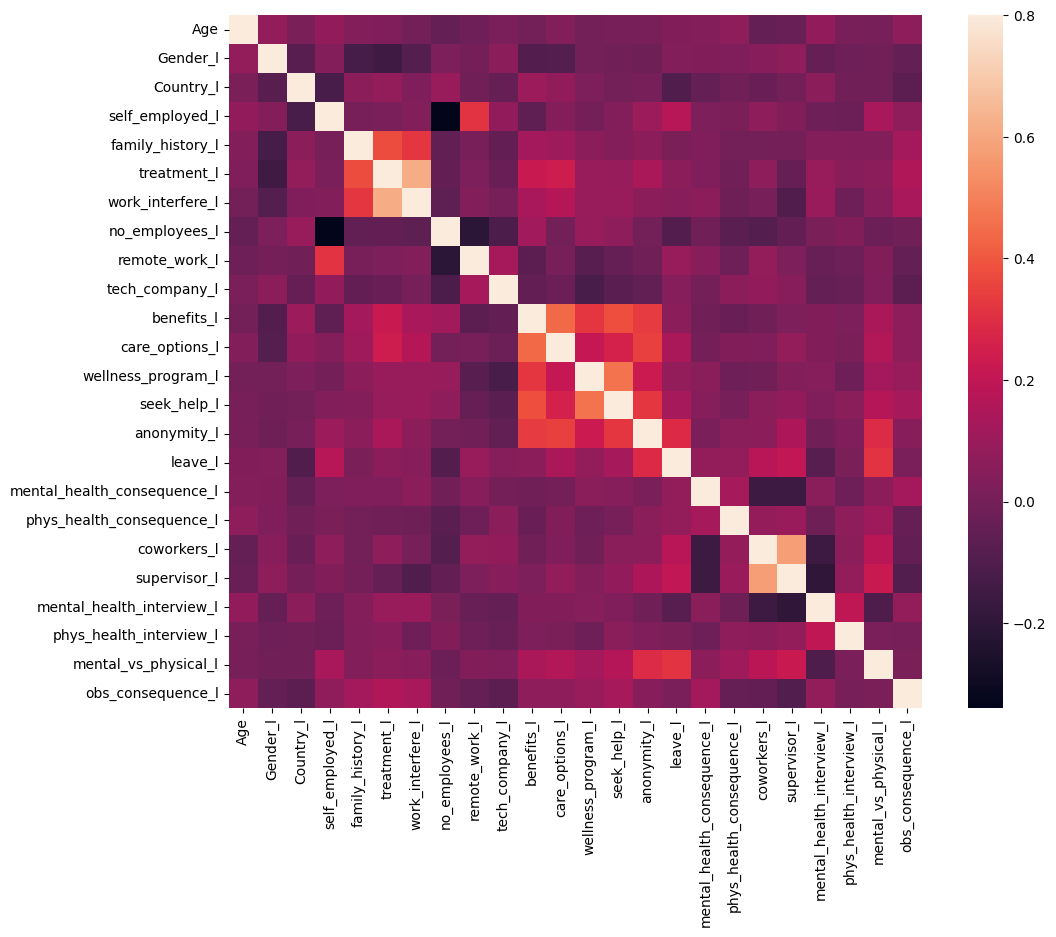

In [27]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

<ipython-input-28-5f8c0ac40b79>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  j.set_xticklabels(labels)


Text(0.5, 1.0, 'Total Distribution by treated or not')

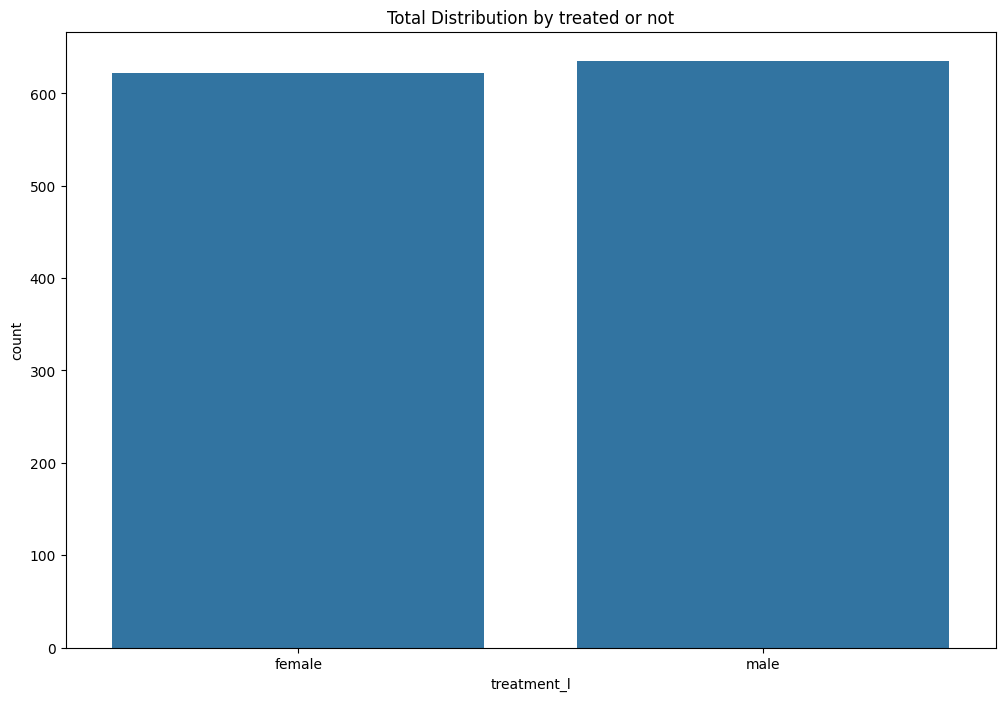

In [28]:
plt.figure(figsize=(12,8))
labels = x['Gender']
j = sns.countplot(x="treatment_l", data=df)
j.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')

<ipython-input-29-c5262eba59a0>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x="family_history_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


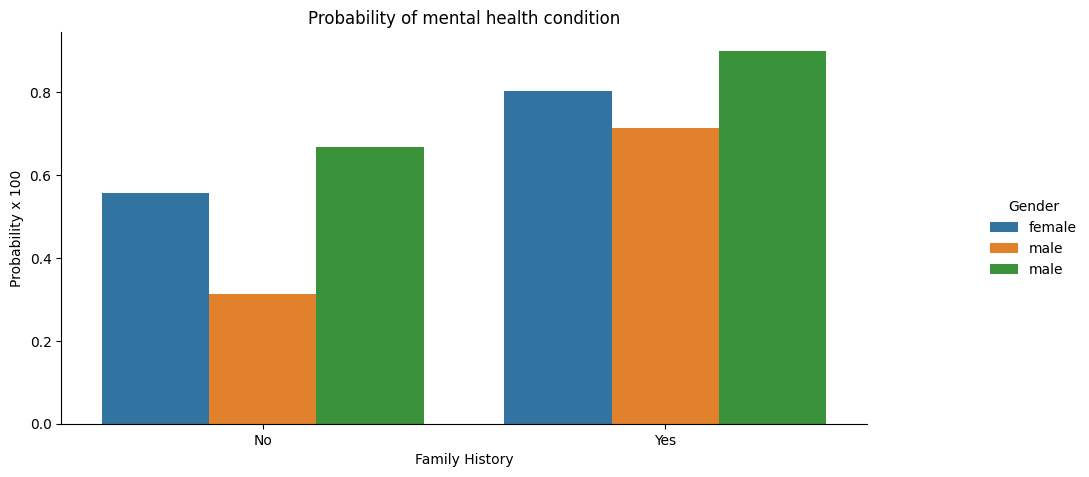

In [29]:
o = x['family_history']
j = sns.catplot(x="family_history_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
j.set_xticklabels(o.unique())  # Set unique categories as tick labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
new_labels = x['Gender']
for t, l in zip(j._legend.texts, new_labels):
    t.set_text(l)
j.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

<ipython-input-30-5b306fdb52f9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x="care_options_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


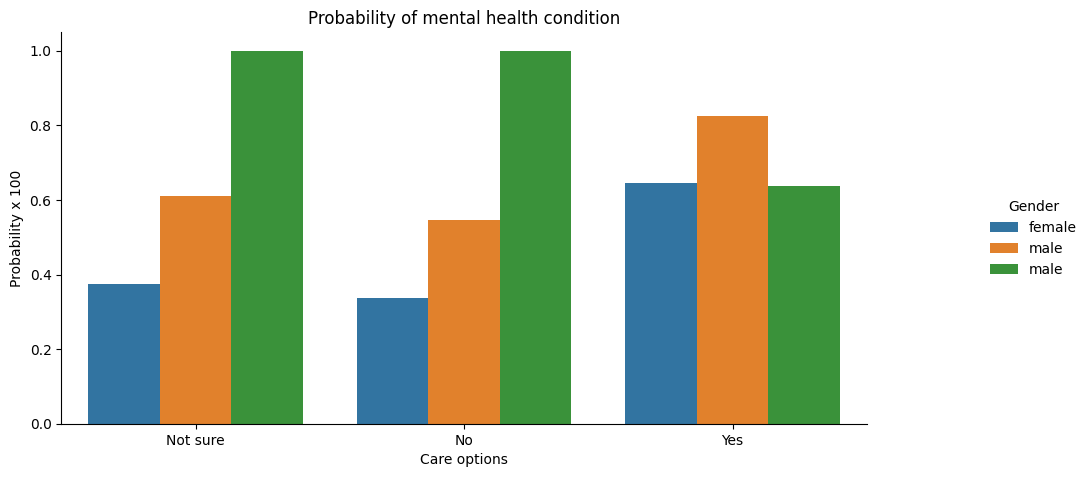

In [30]:
o = x['care_options']
j = sns.catplot(x="care_options_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
j.set_xticklabels(labels=o.unique())
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')
new_labels = x['Gender']
for t, l in zip(j._legend.texts, new_labels):
    t.set_text(l)
j.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

<ipython-input-31-d335b29bb134>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x="benefits_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


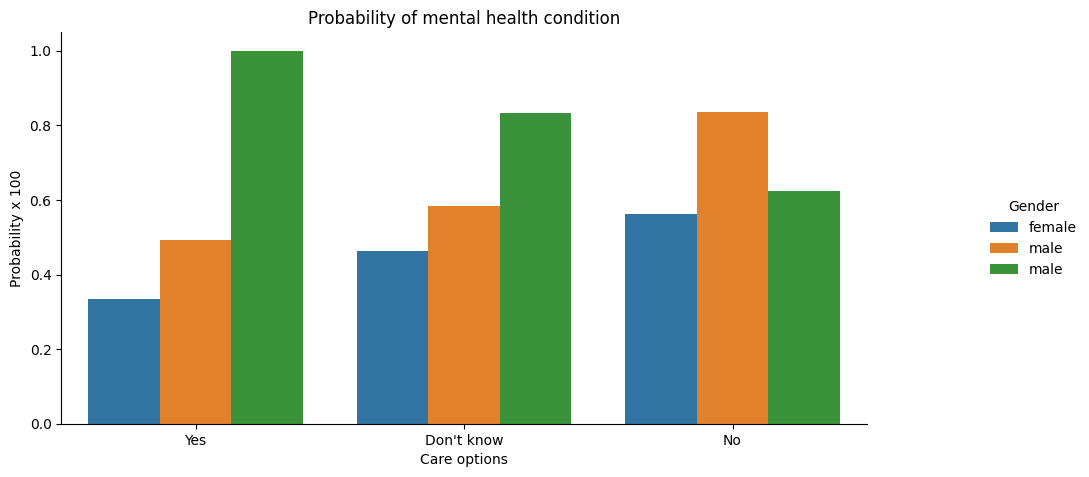

In [31]:
o = x['benefits']
j = sns.catplot(x="benefits_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
j.set_xticklabels(labels=o.unique())
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')
new_labels = x['Gender']
for t, l in zip(j._legend.texts, new_labels):
    t.set_text(l)
j.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

<ipython-input-32-05fcffb845eb>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  j = sns.catplot(x="work_interfere_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


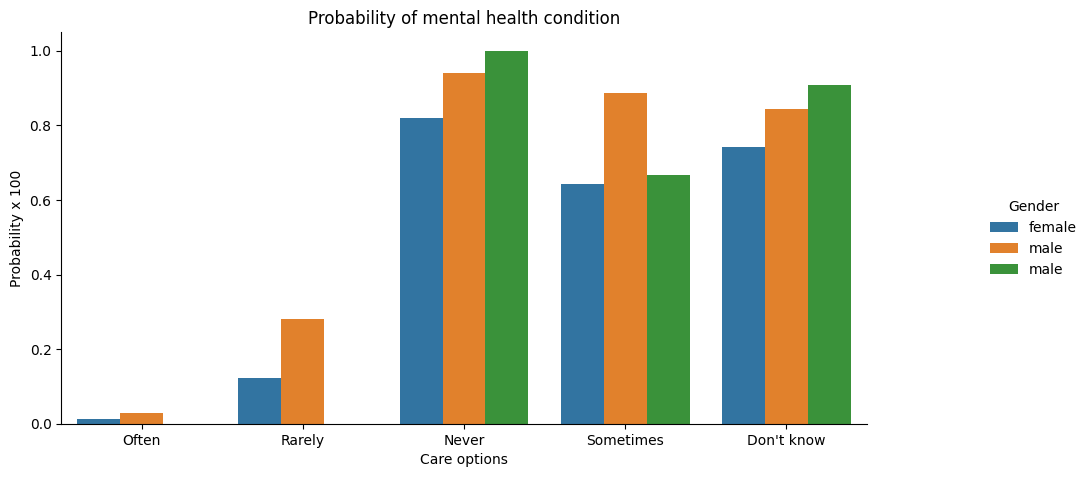

In [32]:
o = x['work_interfere']
j = sns.catplot(x="work_interfere_l", y="treatment_l", hue=x["Gender"], data=df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
j.set_xticklabels(labels=o.unique())
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')
new_labels = x['Gender']
for t, l in zip(j._legend.texts, new_labels):
    t.set_text(l)
j.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [34]:
features=['Age','Gender_l','family_history_l','benefits_l','care_options_l','anonymity_l','leave_l','work_interfere_l']
X=df[features]
y=df.treatment_l
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)
methodDict={}
rmseDict=()

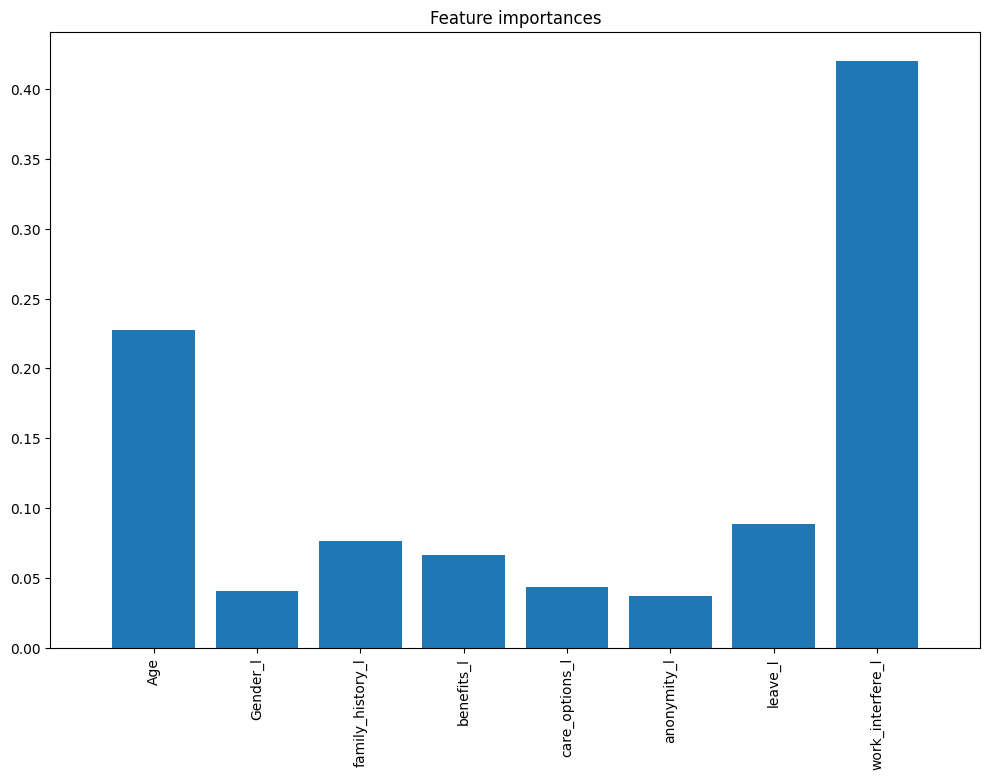

In [35]:
from sklearn.tree import ExtraTreeClassifier
forest = ExtraTreeClassifier(random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances, align="center")
plt.xticks(range(X.shape[1]), features, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [36]:
def logisticRegression():
  logreg=LogisticRegression()
  logreg.fit(X_train,y_train)
  y_pred_class=logreg.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_class)
  print(accuracy)

In [37]:
logisticRegression()

0.7936507936507936


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
def knn():
  k=KNeighborsClassifier(n_neighbors=5)
  k_range = list(range(1, 31))
  weight_options = ['uniform', 'distance']
  param_dist = dict(n_neighbors=k_range, weights=weight_options)
  k = KNeighborsClassifier(n_neighbors=27, weights='uniform')
  k.fit(X_train, y_train)
  y_pred_class = k.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_class)
  print(accuracy)

In [39]:
knn()

0.7645502645502645


In [42]:
def treeClassifier():
  featuresSize=features.__len__()
  param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
  tree.fit(X_train,y_train)
  y_Pred_class=tree.predict(X_test)
  accuracy=accuracy_score(y_test,y_Pred_class)
  print(accuracy)

In [43]:
treeClassifier()

0.8068783068783069


In [50]:
def RandomForest():
    forest = RandomForestClassifier(n_estimators=20, random_state=1)
    featuresize = features.__len__()
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, featuresize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }
    forest.fit(X_train, y_train)
    y_pred_class = forest.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)
    print(accuracy)


In [51]:
RandomForest()

0.8095238095238095


In [52]:
import tensorflow as tf
import argparse

In [53]:
print(tf.__version__)

2.15.0


In [55]:
batch_size=100
train_steps=1000

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [58]:
def train_input_fn():
  dataset=tf.data.Dataset.from_tensor_slices((dict(features),labels))
  return dataset.shuffle(1000).repeat.batch(batch_size)

In [60]:
def eval_input_fn(features, labels, batch_size):
    features = dict(features)
    if labels is None:
        inputs = features
    else:
        inputs = (features, labels)
    dataset = tf.data.Dataset.from_tensor_slices(inputs)
    assert batch_size is not None,
    dataset = dataset.batch(batch_size)
    return dataset

In [61]:
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender_l")
family_history = tf.feature_column.numeric_column("family_history_l")
benefits = tf.feature_column.numeric_column("benefits_l")
care_options = tf.feature_column.numeric_column("care_options_l")
anonymity = tf.feature_column.numeric_column("anonymity_l")
leave = tf.feature_column.numeric_column("leave_l")
work_interfere = tf.feature_column.numeric_column("work_interfere_l")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [64]:
model = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[10, 10],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),)

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
